In [1]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_dataset = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



# Gather Data
[source]("http://lib.stat.cmu.edu/datasets/boston")

## Data point and features

In [2]:
print("size: ", boston_dataset.shape)

size:  (506, 13)


## Data explorations with Pandas dataframes

In [3]:
data = pd.DataFrame(boston_dataset)
data['PRICE'] = target
data = data.rename(columns={0: "CRIM",  1: "ZN", 2: "INDUS", 3: "CHAS", 4: "NOX", 5: "RM", 6: "AGE", 7: "DIS", 8: "RAD", 9: "TAX", 10: "PTRATIO", 11: "B", 12: "LSTAT", 13: "MEDV"})

In [4]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - check for missing values

In [5]:
# pd.isnull(data).any()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, distributions and Bar Chars

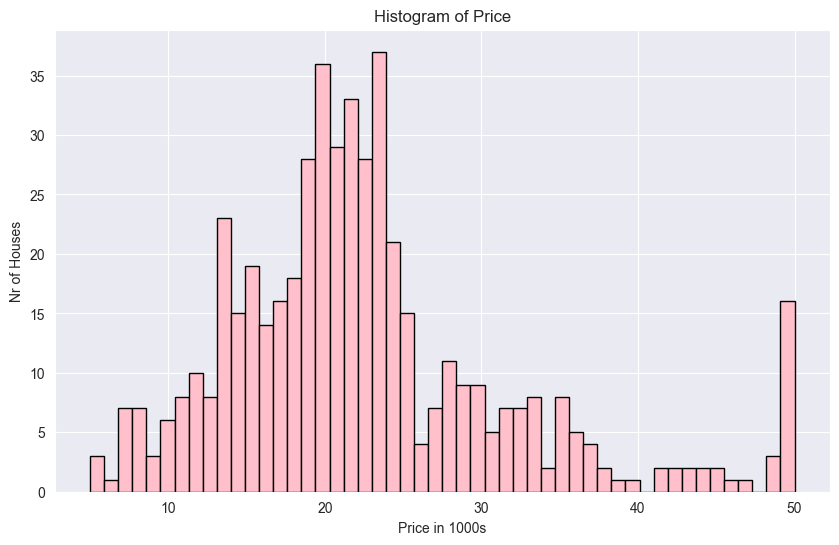

In [6]:
plt.figure(figsize=[10,6])
plt.hist(data["PRICE"], bins=50, edgecolor='black', color="pink")
plt.xlabel("Price in 1000s")
plt.ylabel("Nr of Houses")
plt.title("Histogram of Price")
plt.show()

C:\Users\netan\AppData\Local\Temp\ipykernel_13144\1433517477.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["PRICE"])


6.284634387351787


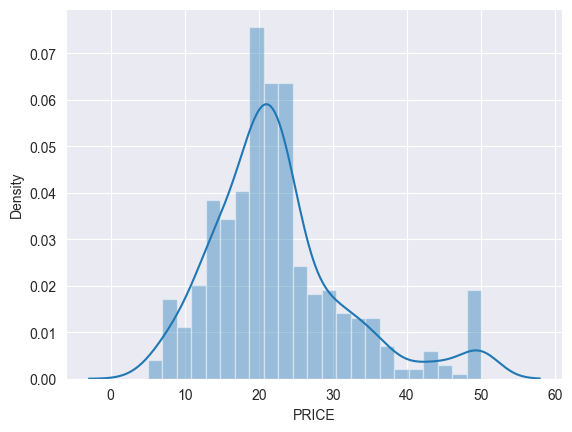

In [7]:
sns.distplot(data["PRICE"])
check = sum(data["RM"])
check = check/len(data["RM"])
print(check)
plt.show()

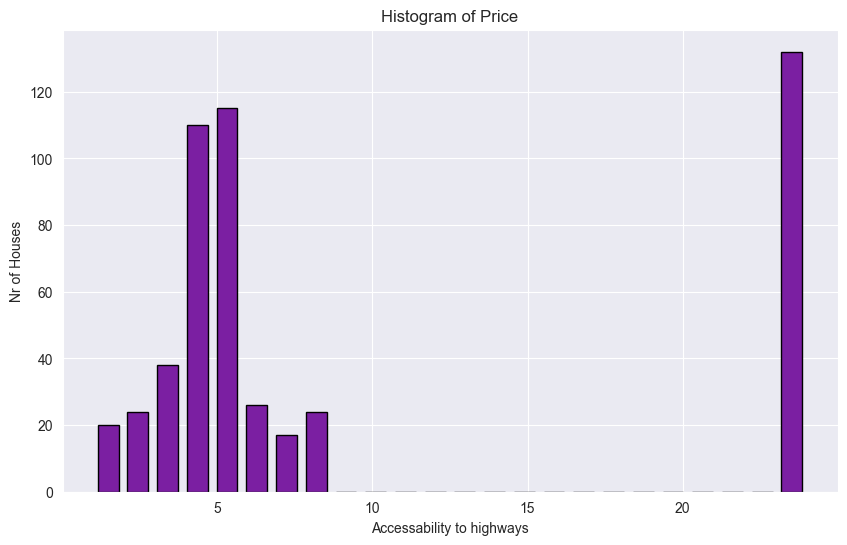

In [8]:
plt.figure(figsize=[10,6])
plt.hist(data["RAD"], bins=24, edgecolor='black', color="#7b1fa2",rwidth=0.7)
plt.xlabel("Accessability to highways")
plt.ylabel("Nr of Houses")
plt.title("Histogram of Price")
plt.show()

In [9]:
data["RAD"].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

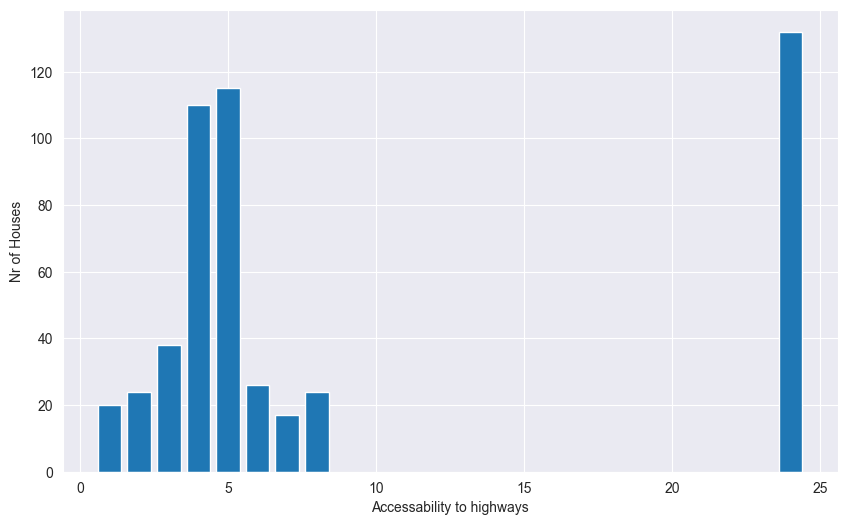

In [10]:
frequency = data["RAD"].value_counts()
# frequency.index
plt.figure(figsize=[10,6])
plt.xlabel("Accessability to highways")
plt.ylabel("Nr of Houses")
# plt.title("Histogram of Price")
plt.bar(frequency.index, height=frequency)
plt.show()

In [11]:
data["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

## Descriptive statistics:

In [12]:
print("get info: " ,data.describe()) #50% - meadian

get info:               CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.14886

## Correlation
## $ \rho _{XY} = corr(X,Y)$
## $ -1.0 \leq \rho _{XY} \leq +1.0 $

In [13]:
data['PRICE'].corr(data['RM'])

0.6953599470715396

In [14]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375618

In [15]:
data.corr() #correlations in the table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

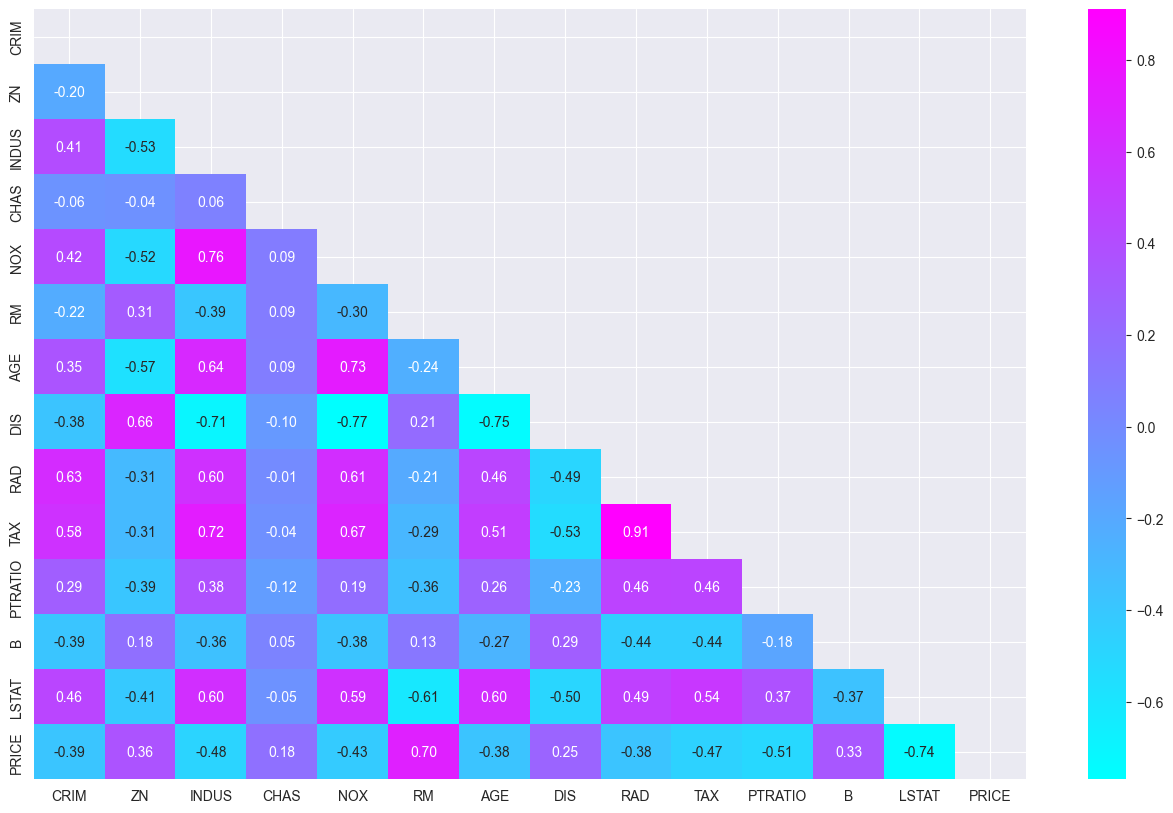

In [17]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='cool', mask=mask)
sns.set_style("white")
plt.show()

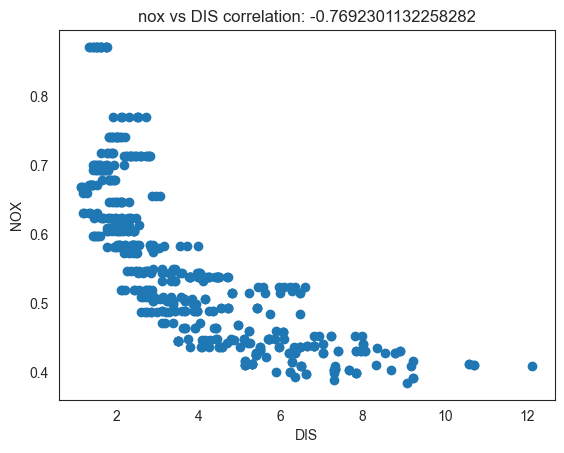

In [18]:
plt.scatter(data["DIS"], data['NOX'])
nox_dis_corr = data['NOX'].corr(data["DIS"])
plt.title("nox vs DIS correlation: " + str(nox_dis_corr))
plt.xlabel("DIS")
plt.ylabel("NOX")
plt.show()

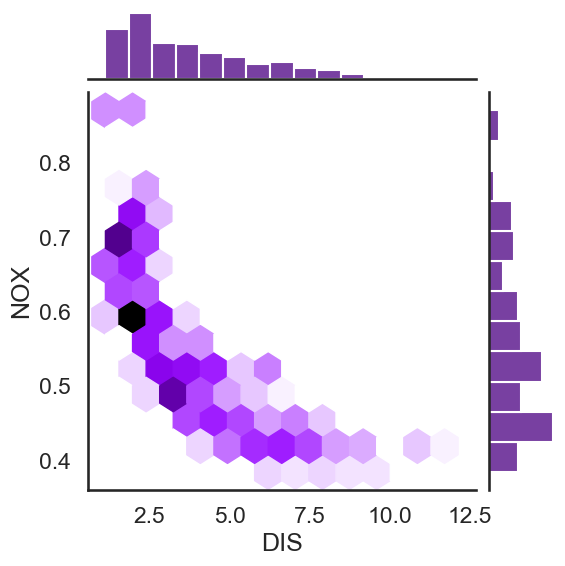

In [19]:
sns.set_context('talk')
sns.jointplot(x=data["DIS"], y=data["NOX"],kind='hex', color='indigo')
plt.show()

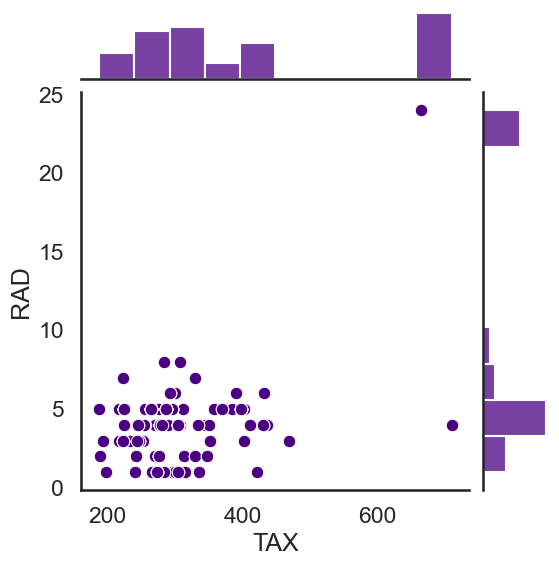

In [20]:
sns.set_context('talk')
sns.jointplot(x=data["TAX"], y=data["RAD"],kind='scatter', color='indigo')
plt.show()

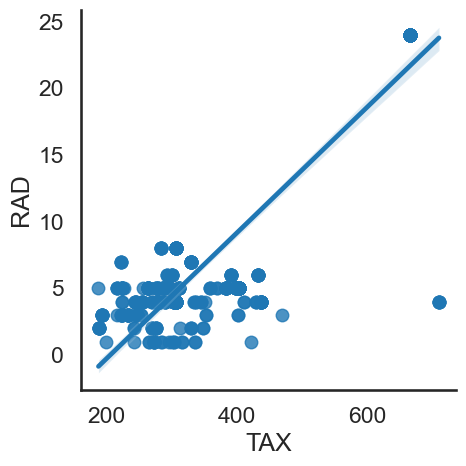

In [21]:
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

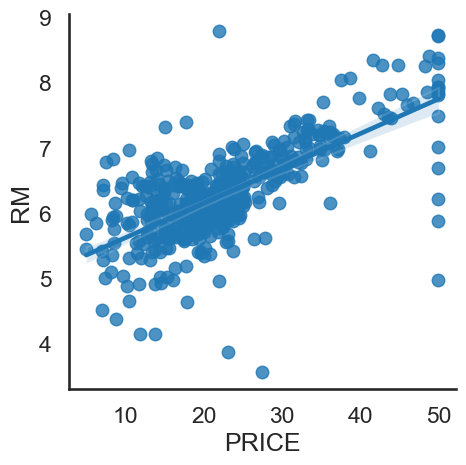

In [22]:
sns.lmplot(x='PRICE', y='RM', data=data)
plt.show()

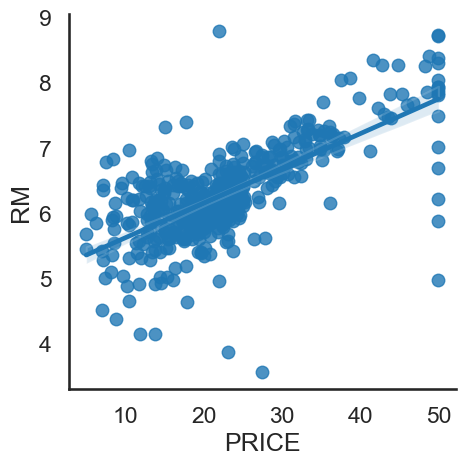

In [23]:
sns.lmplot(x='PRICE', y='RM', data=data)
plt.show()

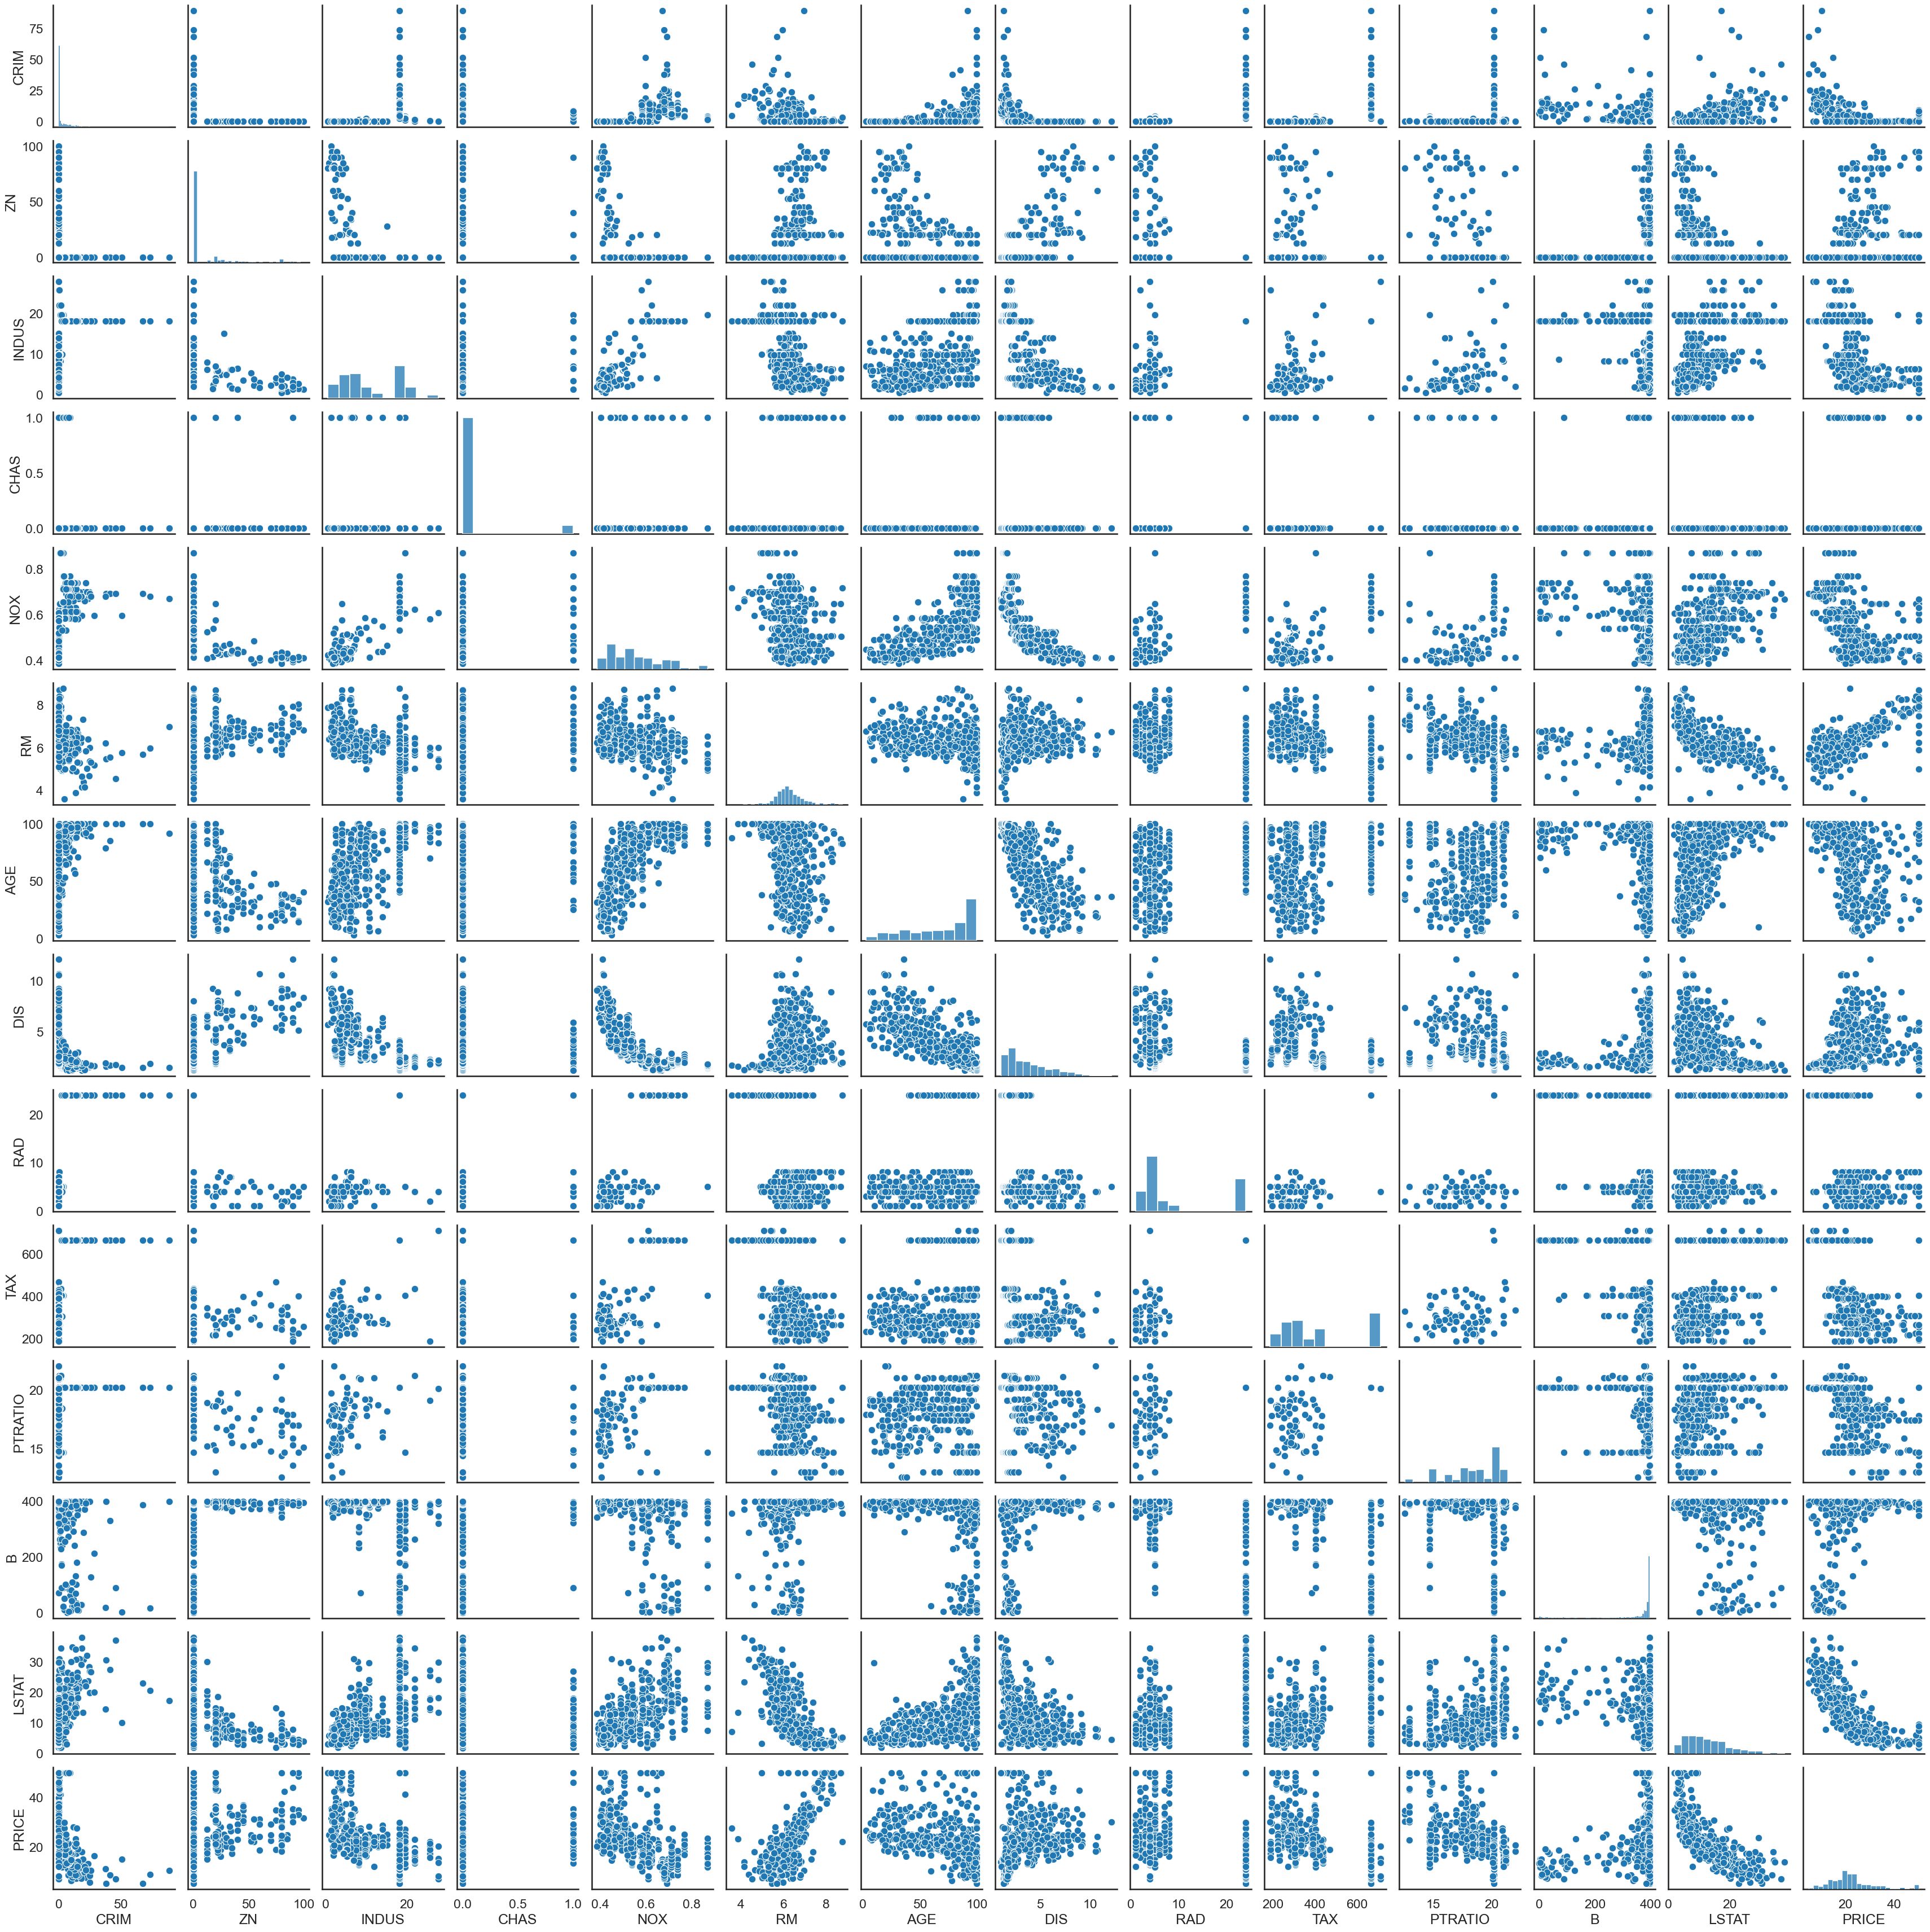

CPU times: total: 1min 3s
Wall time: 1min 5s


In [24]:
%%time
sns.pairplot(data)
plt.show()

In [ ]:
# sns.pairplot(data, kind='reg', plot_kws={"scatter_kws": {"alpha": 0.5}, "line_kws":{"color": "cyan"}})

## Training and test dataset split
## Multivariable regression

In [ ]:
prices = data["PRICE"]
features = data.drop('PRICE', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10 )
regr = LinearRegression()
regr.fit(X_train,Y_train)
print("intercept ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["COEF"])
print("training data rsquared: ", regr.score(X_train, Y_train))
print("test data rsquared: ", regr.score(X_test, Y_test))


## Data transformations
\

In [ ]:
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])
y_log.skew()

In [ ]:
sns.displot(y_log)
plt.title(f"Log price with skew {y_log.skew()}")
plt.show()

In [ ]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, markers=['o'], scatter_kws={'alpha':0.6} ,line_kws={"color": "darkred"})
plt.show()

In [ ]:
transformed_data = features
transformed_data["LOG_PRICE"] =y_log
sns.lmplot(x='LSTAT', y='LOG_'
                        'PRICE', data=transformed_data, markers=['o'], scatter_kws={'alpha':0.6} ,line_kws={"color": "cyan"})

## Regression using log prices

In [ ]:
prices = np.log(data["PRICE"]) #use log prices
features = data.drop('PRICE', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10 )
regr = LinearRegression()
regr.fit(X_train,Y_train)
print("intercept ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["COEF"])
print("training data rsquared: ", regr.score(X_train, Y_train))
print("test data rsquared: ", regr.score(X_test, Y_test))

In [ ]:
# Charles River Property premium
np.e ** 0.080475

## p values and Evaluating Coefficients

In [ ]:
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()
# results.params
# results.pvalues
pd.DataFrame({'coef':results.params, 'p-value': round(results.pvalues, 3)})

## Testing for multicollinearity
# $ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $
# $ VIF _{TAX} = \frac{1}{(1-R _{TAX} ^ 2)} $

In [ ]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

In [ ]:
vif = []
for i in range(len(x_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))
pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

## Model Simplification and the BIC:

In [ ]:
# original model with log prices and all features
x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()
org_coef = pd.DataFrame({'coef':results.params, 'p-value': round(results.pvalues, 3)})
print("BIC ", results.bic)
print("r squared ", results.rsquared)

In [ ]:
# Reduced model #1 excluding indus
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(["INDUS"], axis=1)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()
coef_minus_indus = pd.DataFrame({'coef':results.params, 'p-value': round(results.pvalues, 3)})
print("BIC ", results.bic)
print("r squared ", results.rsquared)

In [ ]:
# Reduced model #2 excluding indus and age
x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(["INDUS", "AGE"], axis=1)
model = sm.OLS(Y_train, x_incl_const)
results = model.fit()
reduced_coef = pd.DataFrame({'coef':results.params, 'p-value': round(results.pvalues, 3)})
print("BIC ", results.bic)
print("r squared ", results.rsquared)

In [ ]:
frames = [org_coef, coef_minus_indus,reduced_coef]
pd.concat(frames, keys=['Original','Reduced','Both'], axis=1)

## Residuals and Residuals Plots

In [ ]:
#modified model: transformed (using log prices) and simplified (dropping two features)
prices = np.log(data["PRICE"]) #use log prices
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=10 )

#Using Statmodel
x_incl_const = sm.add_constant(X_train) # add column of ones to the left of the X_train to create a new matrix
model = sm.OLS(Y_train, x_incl_const) # ordinary least squares (OLS) regression analysis.
results = model.fit() # This estimates the coefficients of the regression model and computes other statistics such as the standard errors, t-values, and p-values.
print("זה המקדם של כל אחד מהמשתנים ",results.params)
#residuals
# residuals = Y_train - results.fittedvalues
# results.resid
# Graph of actual vs predicted prices
print("הערך של Y בהנתן כל אחת מהנקודות ", results.fittedvalues)
print("results.resid returns the residuals (diffrence between observed value and predicted value) " , results.resid)
corr = round(Y_train.corr(results.fittedvalues),2)
plt.scatter(x=Y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(Y_train, Y_train, color="cyan")
plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predicted Log prices $\hat y _i$")
plt.title(f"Actual vs Predicted log prices: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()


plt.scatter(x=np.e**Y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Actual  prices $y _i$", fontsize=14)
plt.ylabel("Predicted prices $\hat y _i$")
plt.title(f"Actual vs Predicted prices: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()

#Residuald vs Predicted value
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
# plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Predicted log prices  $\hat y _i$", fontsize=14)
plt.ylabel("Residuals")
plt.title(f"Residuals vs fitted values")
plt.show()

# MSE
reduced_log_mse = round(results.mse_resid,3)
reduced_log_squared = round(results.rsquared,3)


In [ ]:
resid_mean = round(results.resid.mean(), 2)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log Price Model: Residuals skew ({resid_skew} Mean ({resid_mean}')
plt.show()

In [ ]:
## OG model
prices = data["PRICE"]
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['PRICE'], axis=1), prices, test_size=0.2, random_state=10 )
#
# #Using Statmodel
x_incl_const = sm.add_constant(X_train) # add column of ones to the left of the X_train to create a new matrix
model = sm.OLS(Y_train, x_incl_const) # ordinary least squares (OLS) regression analysis.
results = model.fit() # This estimates the coefficients of the regression model and computes other statistics such as the standard errors, t-values, and p-values.
print("זה המקדם של כל אחד מהמשתנים ",results.params)
# #residuals
# residuals = Y_train - results.fittedvalues
# results.resid
# Graph of actual vs predicted prices
print("הערך של Y בהנתן כל אחת מהנקודות ", results.fittedvalues)
print("results.resid returns the residuals (diffrence between observed value and predicted value) " , results.resid)
corr = round(Y_train.corr(results.fittedvalues),2)
plt.scatter(x=Y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(Y_train, Y_train, color="cyan")
plt.xlabel("Actual  prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted prices $\hat y _i$")
plt.title(f"Actual vs Predicted prices: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()

#Residuald vs Predicted value
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
# plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Predicted log prices  $\hat y _i$", fontsize=14)
plt.ylabel("Residuals")
plt.title(f"Residuals vs fitted values")
plt.show()

#Residual Distribution
resid_mean = round(results.resid.mean(), 2)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals skew ({resid_skew} Mean ({resid_mean}')
plt.show()
# MSE
full_normal_mse = round(results.mse_resid,3)
full_normal_squared = round(results.rsquared,3)

In [ ]:
## Model Omitting key features using log prices
prices = np.log(data["PRICE"])
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1), prices, test_size=0.2, random_state=10 )
#
# #Using Statmodel
x_incl_const = sm.add_constant(X_train) # add column of ones to the left of the X_train to create a new matrix
model = sm.OLS(Y_train, x_incl_const) # ordinary least squares (OLS) regression analysis.
results = model.fit() # This estimates the coefficients of the regression model and computes other statistics such as the standard errors, t-values, and p-values.
print("זה המקדם של כל אחד מהמשתנים ",results.params)
# #residuals
# residuals = Y_train - results.fittedvalues
# results.resid
# Graph of actual vs predicted prices
print("הערך של Y בהנתן כל אחת מהנקודות ", results.fittedvalues)
print("results.resid returns the residuals (diffrence between observed value and predicted value) " , results.resid)
corr = round(Y_train.corr(results.fittedvalues),2)
plt.scatter(x=Y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(Y_train, Y_train, color="cyan")
plt.xlabel("Actual log prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted log prices $\hat y _i$")
plt.title(f"Actual vs Predicted prices with omitted vars: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()

#Residuald vs Predicted value
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)
# plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Predicted log prices  $\hat y _i$", fontsize=14)
plt.ylabel("Residuals")
plt.title(f"Residuals vs fitted values")
plt.show()
# MSE
omitted_var_mse = round(results.mse_resid,3)
omitted_var_squared = round(results.rsquared,3)


In [ ]:
pd.DataFrame({'R-Squared': [reduced_log_squared, full_normal_squared, omitted_var_squared],
              'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse],
              'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
             index=['Reduced Log-Squared', 'Full Normal-Squared', 'Omitted Variables'])


In [ ]:
# calc for 30 grand in the reduced model (log on prices)
print("1 s.d. in log prices is ", np.sqrt(reduced_log_mse))
print("1 s.d. in log prices is ", np.sqrt(reduced_log_mse)*2)

upper_bound = np.log(30) + np.sqrt(reduced_log_mse)*2
lower_bound = np.log(30) - np.sqrt(reduced_log_mse)*2
print('the upper bound on log ' , upper_bound)
print('the upper bound without log' , np.e**upper_bound * 1000)
print('the lower bound on log' , lower_bound)
print('the lower bound without log' , np.e**lower_bound * 1000)

C:\Users\netan\AppData\Local\Temp\ipykernel_13144\3273685078.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='navy')


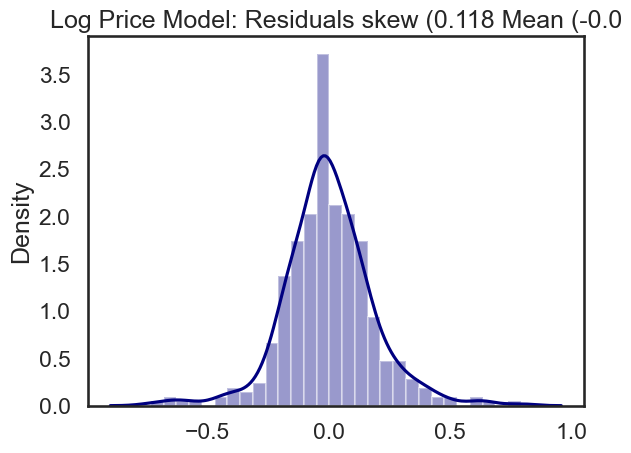

In [99]:
resid_mean = round(results.resid.mean(), 2)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log Price Model: Residuals skew ({resid_skew} Mean ({resid_mean}')
plt.show()

זה המקדם של כל אחד מהמשתנים  const      36.533051
CRIM       -0.128181
ZN          0.063198
INDUS      -0.007576
CHAS        1.974515
NOX       -16.271989
RM          3.108456
AGE         0.016292
DIS        -1.483014
RAD         0.303988
TAX        -0.012082
PTRATIO    -0.820306
B           0.011419
LSTAT      -0.581626
dtype: float64
הערך של Y בהנתן כל אחת מהנקודות  50     21.029586
367    12.218445
34     13.747853
78     20.735152
172    23.412624
         ...    
320    24.845994
15     19.891932
484    19.167460
125    22.406342
265    28.570612
Length: 404, dtype: float64
results.resid returns the residuals (diffrence between observed value and predicted value)  50     -1.329586
367    10.881555
34     -0.247853
78      0.464848
172    -0.312624
         ...    
320    -1.045994
15      0.008068
484     1.432540
125    -1.006342
265    -5.770612
Length: 404, dtype: float64


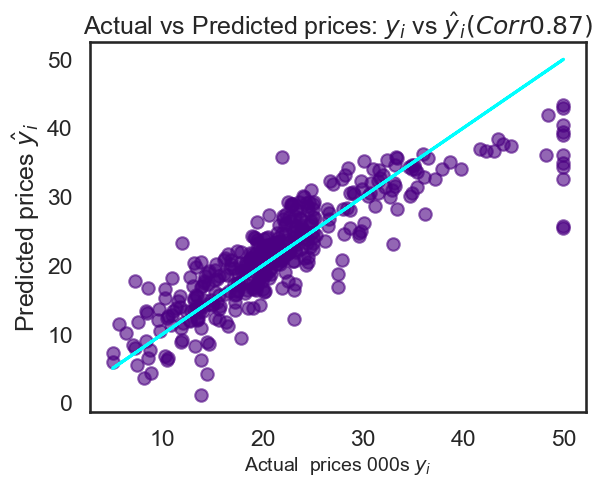

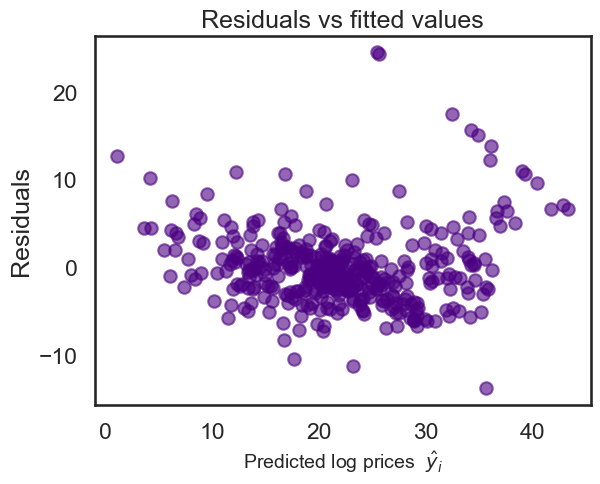

C:\Users\netan\AppData\Local\Temp\ipykernel_13144\1174003483.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, color='indigo')


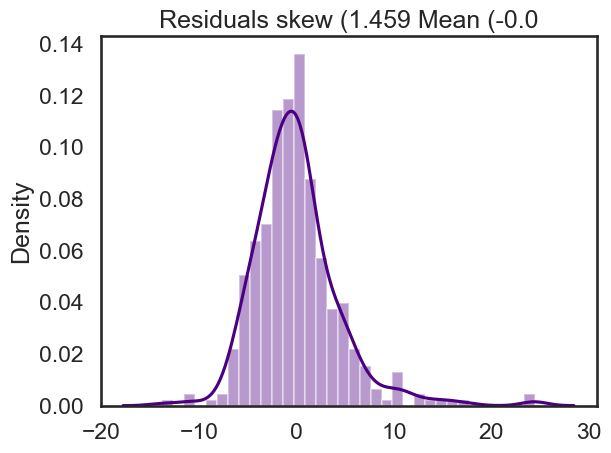

In [100]:
## OG model
prices = data["PRICE"]
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['PRICE'], axis=1), prices, test_size=0.2, random_state=10 )
#
# #Using Statmodel
x_incl_const = sm.add_constant(X_train) # add column of ones to the left of the X_train to create a new matrix
model = sm.OLS(Y_train, x_incl_const) # ordinary least squares (OLS) regression analysis.
results = model.fit() # This estimates the coefficients of the regression model and computes other statistics such as the standard errors, t-values, and p-values.
print("זה המקדם של כל אחד מהמשתנים ",results.params)
# #residuals
# residuals = Y_train - results.fittedvalues
# results.resid
# Graph of actual vs predicted prices
print("הערך של Y בהנתן כל אחת מהנקודות ", results.fittedvalues)
print("results.resid returns the residuals (diffrence between observed value and predicted value) " , results.resid)
corr = round(Y_train.corr(results.fittedvalues),2)
plt.scatter(x=Y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(Y_train, Y_train, color="cyan")
plt.xlabel("Actual  prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted prices $\hat y _i$")
plt.title(f"Actual vs Predicted prices: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()

#Residuald vs Predicted value
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
# plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Predicted log prices  $\hat y _i$", fontsize=14)
plt.ylabel("Residuals")
plt.title(f"Residuals vs fitted values")
plt.show()

#Residual Distribution
resid_mean = round(results.resid.mean(), 2)
resid_skew = round(results.resid.skew(),3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals skew ({resid_skew} Mean ({resid_mean}')
plt.show()
# MSE
full_normal_mse = round(results.mse_resid,3)
full_normal_squared = round(results.rsquared,3)

זה המקדם של כל אחד מהמשתנים  const      3.934826
ZN         0.003108
CHAS       0.150320
DIS       -0.004306
RAD        0.014640
TAX       -0.001400
PTRATIO   -0.045291
B          0.000907
dtype: float64
הערך של Y בהנתן כל אחת מהנקודות  50     3.287143
367    2.551697
34     2.821611
78     2.932922
172    3.190768
         ...   
320    3.059121
15     2.952093
484    2.759307
125    3.176631
265    3.459308
Length: 404, dtype: float64
results.resid returns the residuals (diffrence between observed value and predicted value)  50    -0.306524
367    0.588136
34    -0.218921
78     0.121079
172   -0.050935
         ...   
320    0.110564
15     0.038626
484    0.265984
125   -0.113240
265   -0.332547
Length: 404, dtype: float64


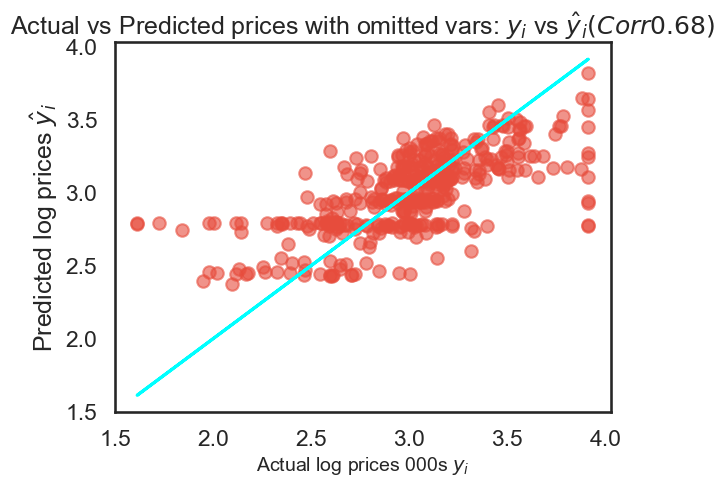

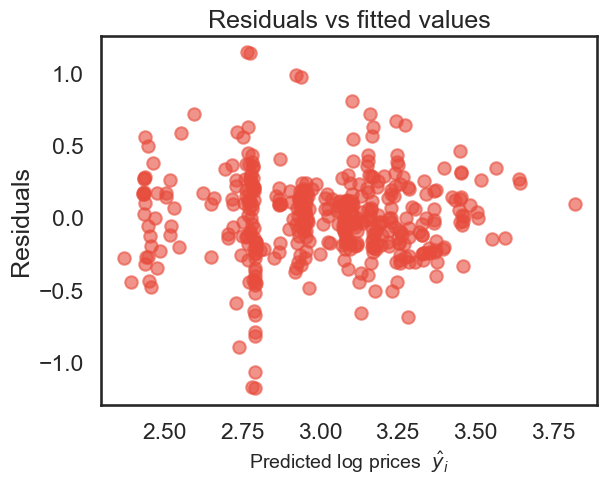

In [101]:
## Model Omitting key features using log prices
prices = np.log(data["PRICE"])
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1), prices, test_size=0.2, random_state=10 )
#
# #Using Statmodel
x_incl_const = sm.add_constant(X_train) # add column of ones to the left of the X_train to create a new matrix
model = sm.OLS(Y_train, x_incl_const) # ordinary least squares (OLS) regression analysis.
results = model.fit() # This estimates the coefficients of the regression model and computes other statistics such as the standard errors, t-values, and p-values.
print("זה המקדם של כל אחד מהמשתנים ",results.params)
# #residuals
# residuals = Y_train - results.fittedvalues
# results.resid
# Graph of actual vs predicted prices
print("הערך של Y בהנתן כל אחת מהנקודות ", results.fittedvalues)
print("results.resid returns the residuals (diffrence between observed value and predicted value) " , results.resid)
corr = round(Y_train.corr(results.fittedvalues),2)
plt.scatter(x=Y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(Y_train, Y_train, color="cyan")
plt.xlabel("Actual log prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted log prices $\hat y _i$")
plt.title(f"Actual vs Predicted prices with omitted vars: $y _i$ vs $\hat y _i (Corr {corr})$")
plt.show()

#Residuald vs Predicted value
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)
# plt.plot(np.e**Y_train, np.e**Y_train, color="cyan")
plt.xlabel("Predicted log prices  $\hat y _i$", fontsize=14)
plt.ylabel("Residuals")
plt.title(f"Residuals vs fitted values")
plt.show()
# MSE
omitted_var_mse = round(results.mse_resid,3)
omitted_var_squared = round(results.rsquared,3)


In [105]:
pd.DataFrame({'R-Squared': [reduced_log_squared, full_normal_squared, omitted_var_squared],
              'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse],
              'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
             index=['Reduced Log-Squared', 'Full Normal-Squared', 'Omitted Variables'])


,R-Squared,MSE,RMSE
Reduced Log-Squared,0.792,0.035,0.187083
Full Normal-Squared,0.750,19.921,4.463295
Omitted Variables,0.460,0.090,0.300000


In [109]:
# calc for 30 grand in the reduced model (log on prices)
print("1 s.d. in log prices is ", np.sqrt(reduced_log_mse))
print("1 s.d. in log prices is ", np.sqrt(reduced_log_mse)*2)

upper_bound = np.log(30) + np.sqrt(reduced_log_mse)*2
lower_bound = np.log(30) - np.sqrt(reduced_log_mse)*2
print('the upper bound on log ' , upper_bound)
print('the upper bound without log' , np.e**upper_bound * 1000)
print('the lower bound on log' , lower_bound)
print('the lower bound without log' , np.e**lower_bound * 1000)

1 s.d. in log prices is  0.18708286933869708
1 s.d. in log prices is  0.37416573867739417
the upper bound on log  3.7753631203395495
the upper bound without log 43613.34233239937
the lower bound on log 3.0270316429847615
the lower bound without log 20635.886906824155
